<a href="https://colab.research.google.com/github/gernandofranca/projetos_dsnp/blob/main/Analisando_os_Dados_do_Airbnb_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Santiago*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para esta análise exploratória inicial, será baixada apenas o seguinte arquivo:


*   listining.csv - *Summay information and metrics for listinings in Santiago (good for visualizations)*.

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto dos dados](http://data.insideairbnb.com/chile/rm/santiago/2021-09-28/data/listings.csv.gz) exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/sbxfssq5huxvekj/listings_santiago.csv?dl=1) o conjunto que utilizamos para que sempres consiga utilizar esse material. **Resolver esse problema depois**

Com isso em mente, vamos ao projeto.



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("https://www.dropbox.com/s/sbxfssq5huxvekj/listings_santiago.csv?dl=1")

## Análise dos Dados


Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número de id gerado apra identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbournhood_group - esta coluna não contém nenhum dado válido
* neighbournhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferidco
* price - preço de aluguel do imóvel
* minimum_nights - quantidade mínima de noites para reservar
* numbers_of_reviews - data o último review
* reviews_per_month - quantidade e reviews por mês
* calculated_host_listings_counts - quantidade de imóveis do mesmo anfitrião
* avaliability_365- número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Número de reviews
* license - licença
* price_brl - Preço de alguel do imóvel em reais brasileiro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

## Conversão dos preços de alugueis de Peso Chileno para Real Brasileiro
1 Peso Chileno = 0,0066 Real Brasileiro 

In [ ]:
price_brl = df.price * 0.0066
df['price_brl'] = df.apply(lambda row: row['price'] * 0.0066, axis=1)

In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_brl
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-02-22,0.56,1,188,6,NaN,1716.0000
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,42256,3,0,NaN,NaN,2,178,0,NaN,278.8896
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,43053,1,45,2019-04-22,0.44,3,332,0,NaN,284.1498
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2017-06-10,0.60,1,363,1,NaN,989.9934
4,53917,Estudio un ambiente Metro Bellas Artes,252213,Patricia,NaN,Santiago,-33.43524,-70.64544,Entire home/apt,27782,60,8,2019-05-11,0.23,1,89,0,NaN,183.3612


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print('Variáveis:\t{}\n'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	9383
Variáveis:	19



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
price_brl                         float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
license                            98.848982
reviews_per_month                  37.493339
last_review                        37.493339
name                                0.042630
host_name                           0.021315
price_brl                           0.000000
longitude                           0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
price                               0.000000
room_type                           0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

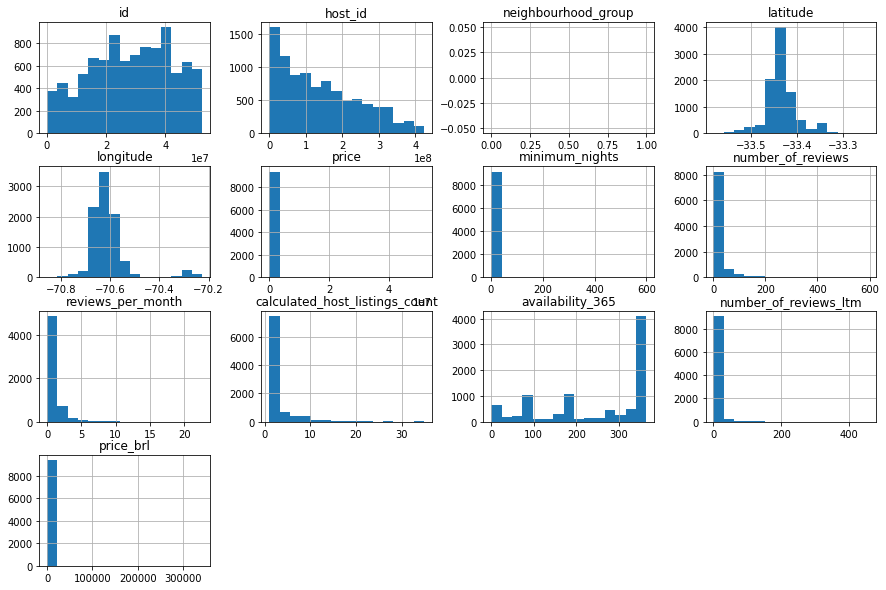

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


Q3.1 Identificando Outliers

In [36]:
#Identificando outliers
df[['price_brl', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price_brl,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9383.000000,9383.000000,9383.000000,5865.000000,9383.000000,9383.000000
mean,510.599223,7.115315,16.406267,0.833488,2.906000,247.994138
std,5607.471376,27.578301,37.880124,1.276572,4.163943,126.721640
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,132.000000,1.000000,0.000000,0.100000,1.000000,147.000000
50%,210.480600,2.000000,2.000000,0.360000,1.000000,306.000000
75%,318.436800,3.000000,14.000000,1.060000,3.000000,364.000000
max,342030.579000,600.000000,596.000000,22.640000,35.000000,365.000000


Q3.1.2 Boxplot e análise minimun_nights

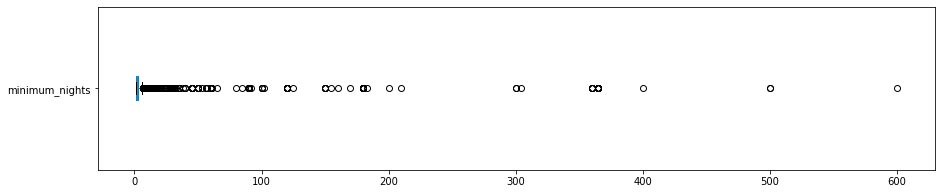

mininum_nights: valores acima de 20:
611 entradas
6.5118%


In [ ]:

#mininum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 20 dias para mininum_nights
print('mininum_nights: valores acima de 20:')
print('{} entradas'.format(len(df[df.minimum_nights > 20])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 20]) / df.shape[0])*100))


Q3.1.3 Boxplot e análise price_brl

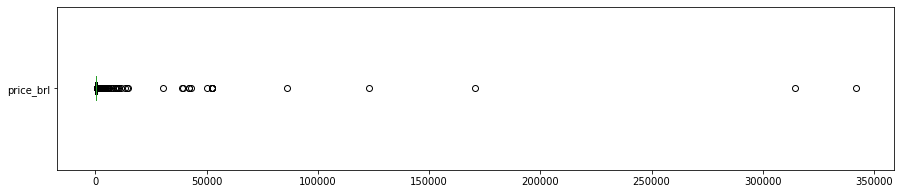

price_brl: valores acima de 1200:
455 entradas
4.8492%


In [ ]:
#price_brl
df.price_brl.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 1200 para price_brl
print('price_brl: valores acima de 1200:')
print('{} entradas'.format(len(df[df.price_brl > 1200])))
print('{:.4f}%'.format((len(df[df.price_brl > 1200]) / df.shape[0])*100))



Q3.2 Histograma sem outliers


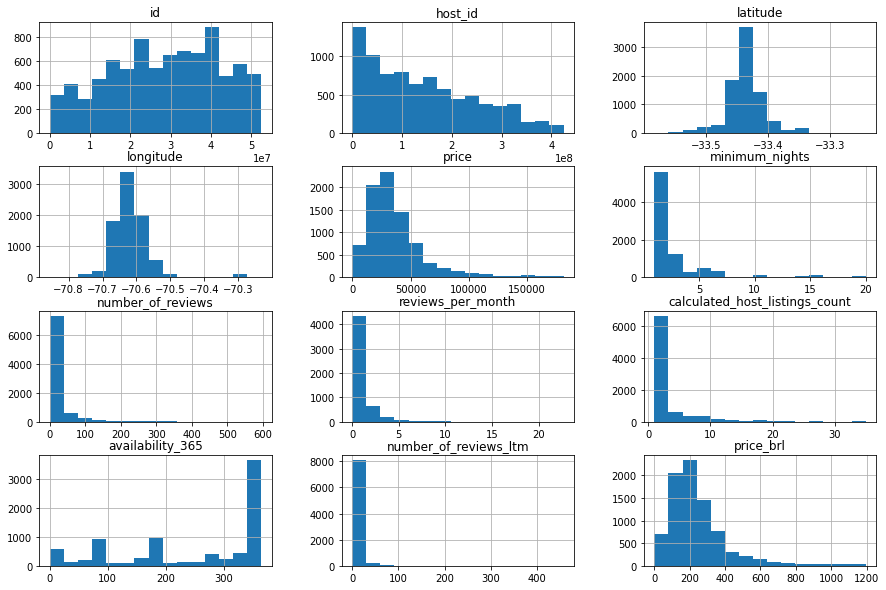

In [ ]:
#remover os *outliers* em um novo DataFrame
df_clean= df.copy()
df_clean.drop(df_clean[df_clean.price_brl > 1200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 20].index, axis=0, inplace=True)


#remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [35]:
# ver a média da coluna `price_brl``
df_clean['price_brl'].mean()


248.17552615826577

In [ ]:
df_clean['price_brl'].describe()

count    8353.000000
mean      248.175526
std       178.566935
min         0.000000
25%       132.000000
50%       202.349400
75%       297.000000
max      1195.213800
Name: price_brl, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr=df_clean[['price_brl', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price_brl,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price_brl,1.000000,0.010116,-0.017010,-0.001387,0.090521,0.050320
minimum_nights,0.010116,1.000000,-0.010484,-0.103879,-0.064268,-0.084566
number_of_reviews,-0.017010,-0.010484,1.000000,0.675026,0.071227,-0.073102
reviews_per_month,-0.001387,-0.103879,0.675026,1.000000,0.146000,-0.012660
calculated_host_listings_count,0.090521,-0.064268,0.071227,0.146000,1.000000,0.058115
availability_365,0.050320,-0.084566,-0.073102,-0.012660,0.058115,1.000000


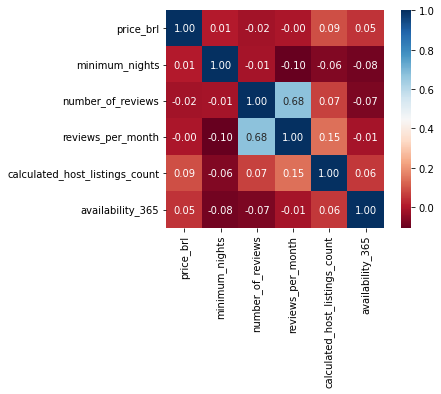

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='Black', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4503
Private room       3572
Shared room         183
Hotel room           95
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] *100


Entire home/apt    53.908775
Private room       42.763079
Shared room         2.190830
Hotel room          1.137316
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price_brl.mean().sort_values(ascending=False)[:20]


neighbourhood
Lo Barnechea        643.658794
Quilicura           342.001383
Lo Espejo           340.418100
Vitacura            324.746883
Las Condes          311.295491
Pudahuel            283.652356
Providencia         261.073673
La Granja           258.501100
Huechuraba          250.826714
Cerro Navia         245.203200
Recoleta            242.619600
Cerrillos           228.342400
Peñalolén           217.888943
Santiago            214.984183
Lo Prado            214.699467
Maipú               213.437125
Estación Central    198.241150
La Florida          197.507390
Macul               182.757463
San Miguel          181.427142
Name: price_brl, dtype: float64

In [ ]:
# ver reviews por mes por bairros, na média
df_clean.groupby(['neighbourhood']).reviews_per_month.mean().sort_values(ascending=False)[:10]

neighbourhood
Estación Central    1.291233
San Miguel          1.100645
Providencia         0.990441
Santiago            0.966409
Recoleta            0.879704
Las Condes          0.868691
Lo Barnechea        0.617391
Maipú               0.608077
Cerrillos           0.592500
Pudahuel            0.572500
Name: reviews_per_month, dtype: float64

In [ ]:
# ver disponibilidade de 365d por bairros, na média
df_clean.groupby(['neighbourhood']).availability_365.mean().sort_values(ascending=False)[10:]

neighbourhood
Recoleta            270.459091
La Florida          265.689655
La Reina            262.873134
San Miguel          259.664062
Macul               258.534653
Quinta Normal       257.333333
Independencia       257.035714
Pudahuel            256.444444
Santiago            253.619980
Maipú               252.166667
Lo Barnechea        245.660550
Providencia         245.299324
Peñalolén           244.428571
Estación Central    242.613636
Ñuñoa               239.146802
Las Condes          233.753383
Vitacura            226.053659
Conchalí            220.142857
Huechuraba          205.904762
Cerrillos           200.555556
Name: availability_365, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c1bbf350>]],
      dtype=object)

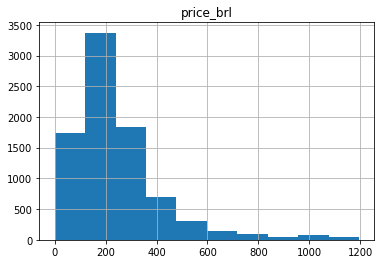

In [ ]:
df_clean.hist('price_brl')

In [ ]:
#Ver quantidade de imóveis no bairro Las Condes
print(df_clean[df_clean.neighbourhood == 'Las Condes'].shape)


(1330, 18)


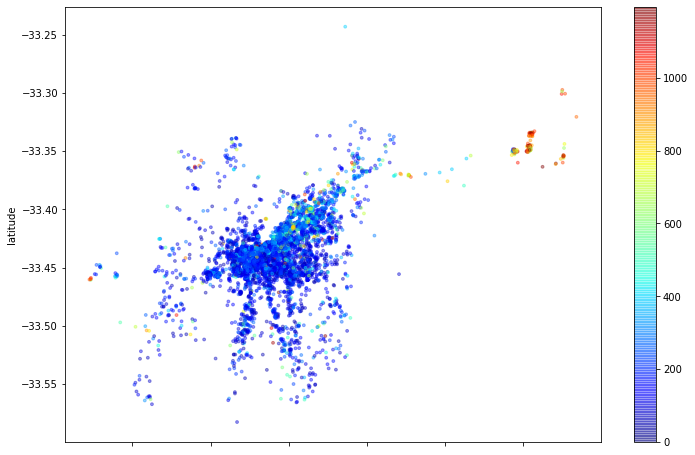

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price_brl'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

2.7138752543996167

## Conclusões


As primeiras conclusões relacionadas a base de dados remetem à necessidade de análise geral dos dados, e avaliar se os dados ausentes comprometem o objetivo da análise, também importante a identificação de outliers e seus tratamentos necessários para que não hajam distorções nas análises.
O dataset utilizado "listings_santiago" possui dados resumidos e a ideia da analise exploratória aqui disposta era de fato trazer alguns dados tratados, a análise completa permite uma exploração macro e várias oportunidades de análise de projetos em Data Science, com seus mais de 100 atributos possíveis.
Os dados explorados mostraram uma grande quantidade de imóveis na região central de Santigo e a um preço médio por noite honesto, já que a cidade é servida pela melhor malha viária de metrô da América Latina, é possível aliar o útil ao agradável e desfrutar da privacidade no qual estão dispostos a maioria dos imóveis na plataforma do Airbnb.